*Creado por:*

*Isabel Maniega*

In [1]:
from IPython import display

# Introducción a orquestadores y planificación (Airflow, Prefect)

**Prefect**

https://www.prefect.io/

Prefect es una herramienta de orquestación de flujos de trabajo en Python de código abierto creada para los ingenieros modernos de datos y aprendizaje automático. Ofrece una API sencilla que te permite construir una canalización de datos rápidamente y gestionarla a través de un panel interactivo. 

Prefect ofrece un modelo de ejecución híbrido, lo que significa que puedes desplegar el flujo de trabajo en la nube y ejecutarlo allí o utilizar el repositorio local.

Comparado con Airflow, Prefect viene con funciones avanzadas como dependencias automatizadas de tareas, activadores basados en eventos, notificaciones integradas, infraestructura específica de flujos de trabajo e intercambio de datos entre tareas. Estas capacidades la convierten en una potente solución para gestionar flujos de trabajo complejos de forma eficiente y eficaz.

Lo primero será realizar la instalación del paquete mediante:

`pip install -U prefect`

In [2]:
# pip install -U prefect

Después, crearemos un script de Python llamado prefect_etl.py en la carpeta de files y escribiremos el siguiente código.

```
from prefect import task, flow
import pandas as pd

# Extract data
@task
def extract_data():
    # Simulating data extraction
    data = {
        "name": ["Alice", "Bob", "Charlie"],
        "age": [25, 30, 35],
        "city": ["New York", "Los Angeles", "Chicago"]
    }
    df = pd.DataFrame(data)
    return df

# Transform data
@task
def transform_data(df: pd.DataFrame):
    # Example transformation: adding a new column
    df["age_plus_ten"] = df["age"] + 10
    return df

# Load data
@task
def load_data(df: pd.DataFrame):
    # Simulating data load
    print("Loading data to target destination:")
    print(df)

# Defining the flow
@flow(log_prints=True)
def etl():
    raw_data = extract_data()
    transformed_data = transform_data(raw_data)
    load_data(transformed_data)

# Running the flow
if __name__ == "__main__":
    etl()

```

El código anterior define las funciones de tarea `extract_data()`, `transform_data()` y `load_data()`y las ejecuta en serie en una función de flujo llamada `etl()`. Estas funciones se crean utilizando decoradores Prefect Python. 

En resumen, estamos creando un DataFrame de pandas, transformándolo y mostrando el resultado final mediante print. Esta es una forma sencilla de simular un canal ETL.

Para ejecutar el flujo de trabajo, basta con ejecutar el script de Python mediante el siguiente comando.

`python prefect_etl.py`

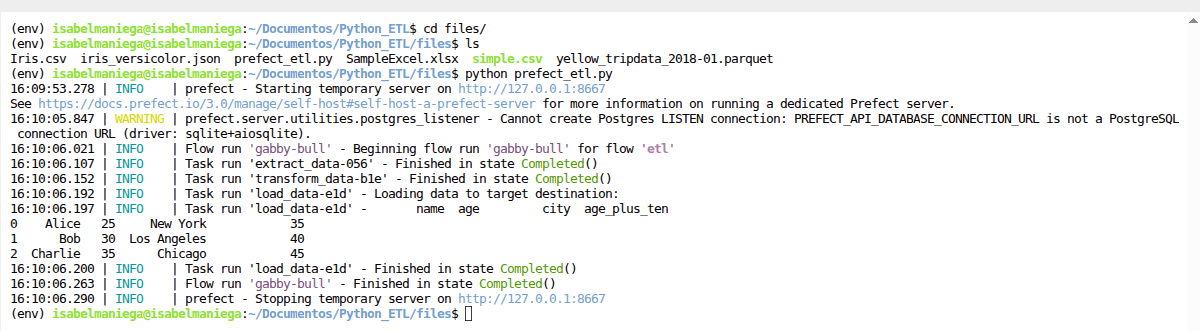

In [3]:
display.Image("./images/prefect_1.png")

Como podemos ver, la ejecución de nuestro flujo de trabajo se ha completado con éxito

**Desplegar el flujo**

Ahora desplegaremos nuestro flujo de trabajo para que podamos ejecutarlo según una programación o activarlo en función de un evento. Desplegar el flujo también nos permite supervisar y gestionar varios flujos de trabajo de forma centralizada.

Para desplegar el flujo, utilizaremos la CLI de Prefect. La función deploy requiere el nombre del archivo Python, el nombre de la función de flujo en el archivo y el nombre de la implantación. En este caso, llamaremos a esta implantación "simple_etl".

`prefect deploy prefect_etl.py:etl -n 'simple_etl'`

Tras ejecutar el script anterior en el terminal, puede que recibamos los siguientes mensajes: 
* La infrastructura que queremos escoger para ejecutar el pool: process, ecs, docker, kubernetes, etc, en nuestro caso escogeremos la primera ejecutarlo en nuestro sistema.
* Nombre del pool: `test`
* Si quieres que ejecuten un código en remoto: le diremos que no `n`.
* Puedes implementar un horario para la ejecución, en este caso le diremos que no `n`.
* Nos pedirá si queremos guardar esta configuración para usarla en un futuro le diremos que si `y`

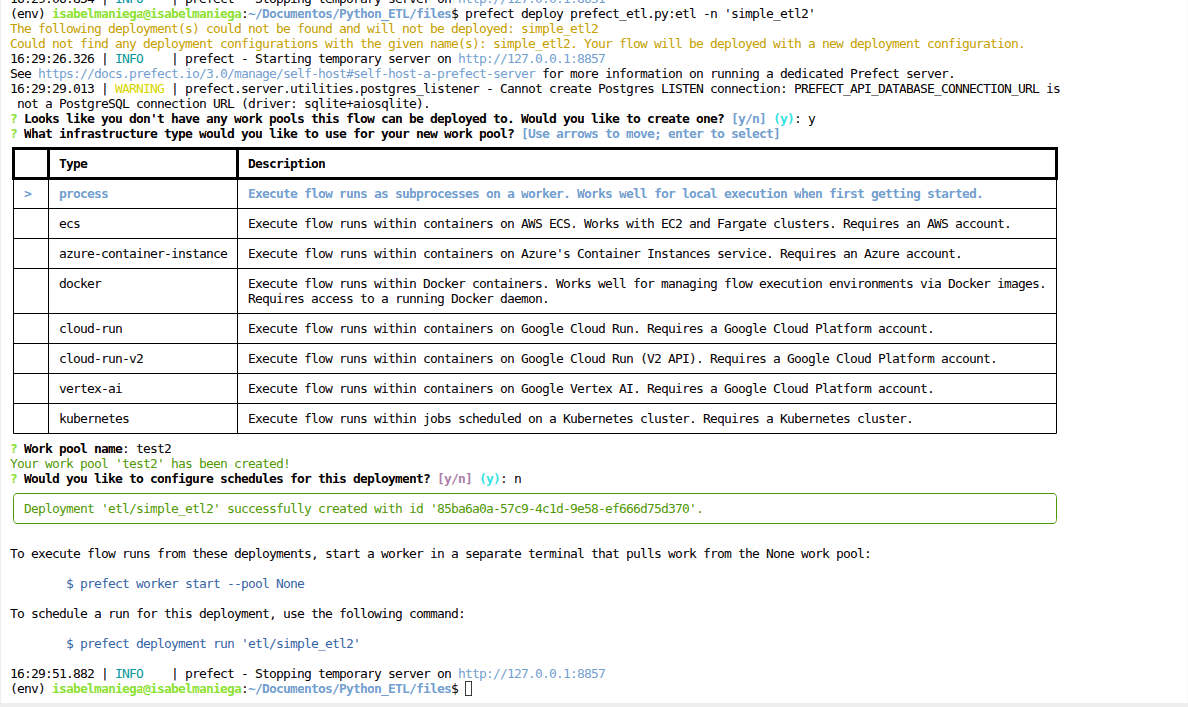

In [4]:
display.Image("./images/prefect_2.png")

Añadimos la configuración para poder ejecutar el pool:

`prefect config set PREFECT_API_URL=http://127.0.0.1:4200/api`

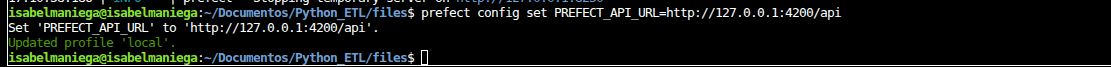

In [5]:
display.Image("./images/prefect_3.png")

Tras ejecutar el script anterior en el terminal, puede que recibamos el mensaje de que no tenemos un grupo de trabajadores para ejecutar el despliegue. Para crear el pool de trabajadores, utiliza el siguiente comando.

`prefect worker start --pool "test"`

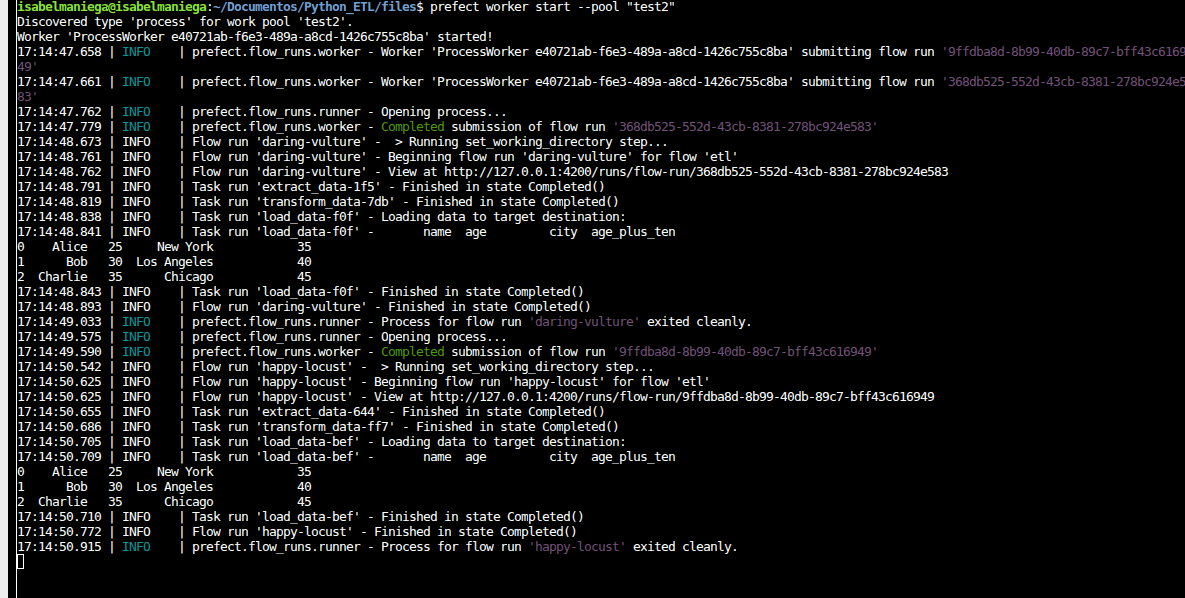

In [6]:
display.Image("./images/prefect_4.png")

Ahora que tenemos un grupo de trabajadores, lanzaremos otra ventana de terminal y ejecutaremos el despliegue. El comando prefect deployment run requiere "<nombre-función-flujo>/<nombre-despliegue>" como argumento, como se muestra en el comando siguiente.

`prefect deployment run 'etl/simple_etl'`

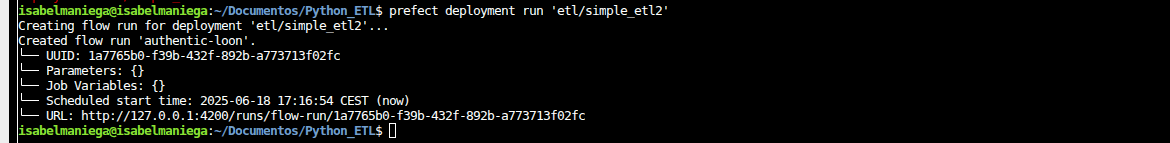

In [7]:
display.Image("./images/prefect_5.png")

Como resultado de la ejecución del despliegue, recibirás el mensaje de que el flujo de trabajo se está ejecutando. Normalmente, al flujo que se crea se le asigna un nombre aleatorio, en mi caso authentic-loon.

Debes iniciar el servidor web de Prefect para visualizar la ejecución del flujo de forma más sencilla y gestionar otros flujos de trabajo.

`$ prefect server start `

Debemos abrir el dashboard en la siguiente url: http://127.0.0.1:4200/dashboard

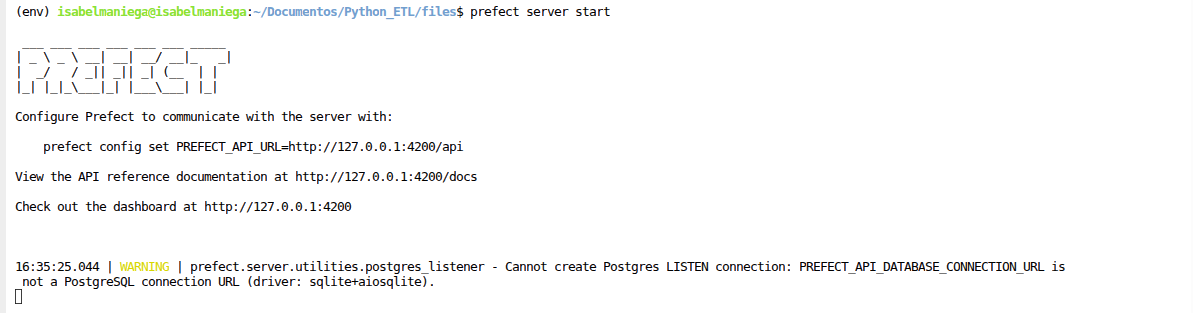

In [8]:
display.Image("./images/prefect_6.png")

Tras ejecutar el comando anterior, se te redirigirá al panel de Prefect. También puedes ir directamente a http://127.0.0.1:4200 en tu navegador.

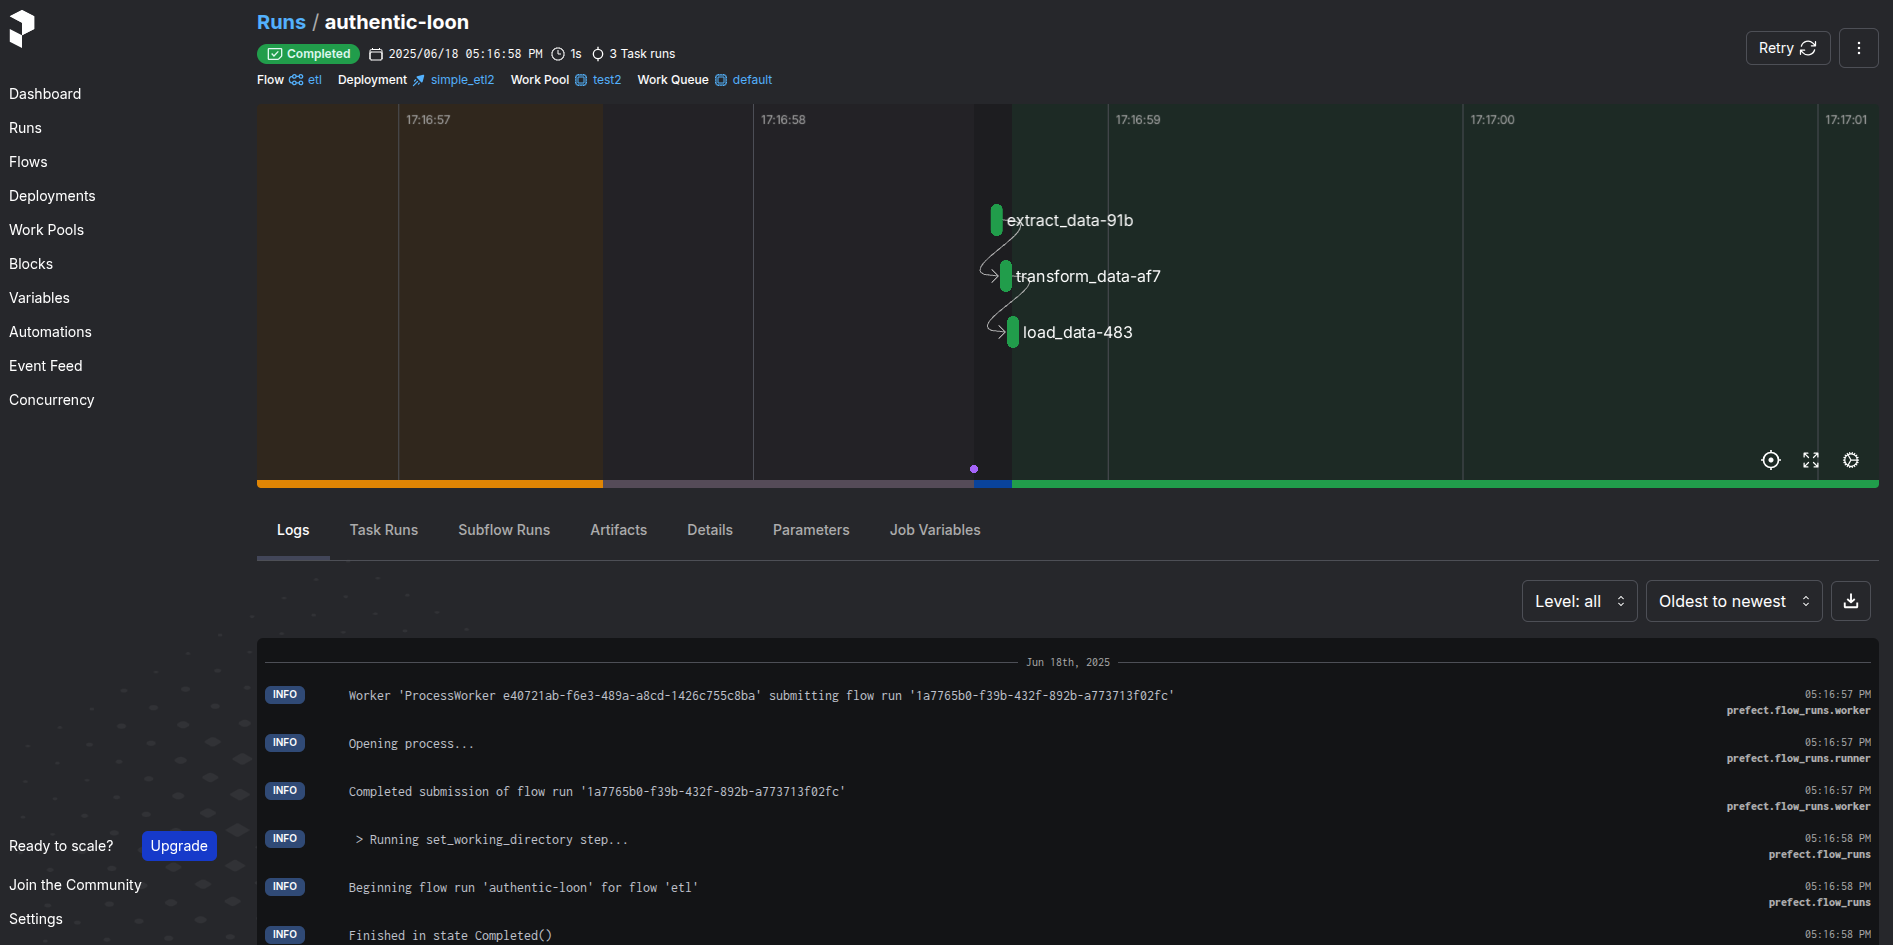

In [9]:
display.Image("./images/prefect_7.png")

El panel de control te permite volver a ejecutar el flujo de trabajo, ver los registros, comprobar los pools de trabajo, establecer notificaciones y seleccionar otras opciones avanzadas. Es una solución completa para tus necesidades modernas de orquestación de datos.

*Creado por:*

*Isabel Maniega*